In [177]:
import numpy as np
import konrad as k

plevels = 200
t = 300
gas = 'CO2'
gases = ["H2O", "CO2", "O2", "CH4", "N2O", "CO", "O3"]
        
def olr(temperature=288, 
        gas_factor = [1,1,1,1,1,1,1], 
        gases = ["H2O", "CO2", "O2", "CH4", "N2O", "CO", "O3"],
        plevels=100):
    # create necessary objects
    cloud =  k.cloud.ClearSky(plevels)
    surface = k.surface.FixedTemperature(temperature)
    plev, phlev = k.utils.get_pressure_grids(1000e2, 1, plevels)
    #          (pressure at surface, p at top, number of levels)
    atmosphere = k.atmosphere.Atmosphere(phlev)
    
    atmosphere.tracegases_rcemip()
    for i, gas in enumerate(gases):
        atmosphere[gas] *= gas_factor[i]   
    # create radiation object, calculate radiation
    rrtmg = k.radiation.rrtmg.RRTMG()
    rrtmg.calc_radiation(atmosphere, surface, cloud)
    return rrtmg['lw_flxu'].squeeze()[-1] # outer dim is time, then uppermost value for TOA



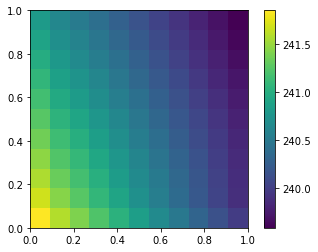

In [167]:
import matplotlib.pyplot as plt

for i in range(10):
    for j in range(10):
        #print(olr(gas_multipliers=[1,i,j,1,1,1,1]))
        pass

def imshowshow():
    x = np.linspace(0,1,11)
    y = np.linspace(0,1,11)
    z = np.repeat(x,len(y)).reshape(len(x),len(y))
    
    for i in range(len(x)):
        for j in range(len(y)):
            #z[i][j] = olr(temperature = 288+j*3, gas_multipliers = [1,1,1,1,i,1,1])
            z[i][j] = olr(gas_factor = [1,1,1,x[i],y[j],1,1])
    
    fig, ax = plt.subplots()
    im = ax.imshow(z,
        interpolation='none',
        extent=[x[0],x[-1],y[0],y[-1]],
        origin='lower')
    plt.colorbar(im)
    
    
def scatterter(m=10,n=10):
    x = np.linspace(0,1,m)
    y = np.linspace(0,1,n)
    for col in range(m):
        for row in range(n):
            plt.scatter(x[col],y[row], marker = 's', s=1000,
                   c=olr(gas_factor=[x[row],1,1,1,1,y[col],1]))
    plt.colorbar()
imshowshow()

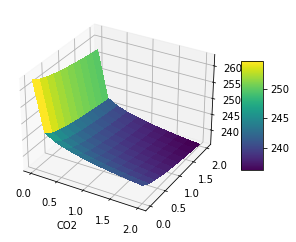

In [180]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

x = np.linspace(0,2,11)
y = np.linspace(0,2,11)
z = np.repeat(x,len(y)).reshape(len(x),len(y))

for i in range(len(x)):
    for j in range(len(y)):
        #z[i][j] = olr(temperature = 288+j*3, gas_multipliers = [1,1,1,1,i,1,1])
        z[i][j] = olr(gas_factor = [1,y[j],1,1,1,1,x[i]])
  
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X, Y = np.meshgrid(x, y)
Z = z
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis,
                       linewidth=0, antialiased=False)

ax.set_xlabel(gases[6])
ax.set_xlabel(gases[1])

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [1]:
import os
print(os.getcwd())

/mnt/lustre01/pf/zmaw/m300872/konrad
